# Tugas


 # Menghitung Jarak data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create dataset from Google Drive
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/test.csv"
df = pd.read_csv(dataset_url)
df

In [ ]:
# Show dataset shape
number_of_columns = df.shape[1]

In [ ]:
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Data Asimetris Biner**

-Over18

-OverTime

In [ ]:
df[["Over18", "OverTime"]].head(5)

Ubah Value ke 0/1

Jika Yes/Y = 1

Jika No/N = 0

In [ ]:
# Over18 code
over18_for_yes = "Y"
over18_for_no = "N"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_over18_to_biner(Over18):
    return value_of_one if Over18 == over18_for_yes else value_of_zero

In [ ]:
# Update all values of 'Over18' series
df["Over18"] = df["Over18"].apply(change_code_over18_to_biner)

In [ ]:
# Overtime code
overtime_for_yes = "Yes"
overtime_for_no = "N0"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_overtime_to_biner(OverTime):
    return value_of_one if OverTime == overtime_for_yes else value_of_zero

In [ ]:
# Update all values of 'OverTime' series
df["OverTime"] = df["OverTime"].apply(change_code_overtime_to_biner)

In [ ]:
df[["Over18", "OverTime"]].head(5)

,Over18,OverTime
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(df, idx, series):
    return df.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(df, [1,2], ["Over18", "OverTime"]).T

,1,2
Over18,1,1
OverTime,0,1


In [ ]:
df.loc[0:5, ["Over18", "OverTime"]]

,Over18,OverTime
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1
5,1,0


In [ ]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index):(last_index), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
df_1_2 = get_dissimilarity_dataset(df, [1,2], ["Over18","OverTime"])

In [ ]:
c_d_1_2 = count_contingency_value(df_1_2, 1, 2)

In [ ]:
# d(1,3)
df_1_3 = get_dissimilarity_dataset(df, [1,3], ["Over18","OverTime"])

In [ ]:
c_d_1_3 = count_contingency_value(df_1_3, 1, 3)

In [ ]:
# d(1,4)
df_1_4 = get_dissimilarity_dataset(df, [1,4], ["Over18","OverTime"])

In [ ]:
c_d_1_4 = count_contingency_value(df_1_4, 1, 4)

In [ ]:
# d(1,5)
df_1_5 = get_dissimilarity_dataset(df, [1,5], ["Over18","OverTime"])

In [ ]:
c_d_1_5 = count_contingency_value(df_1_5, 1, 5)

**Dissimilarity Binary Assymetric Value Formula**


$$ \frac {r+s}{q+r+s} $$

   

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)
d_1_5 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_5)

In [ ]:
d_1_2

0.5

In [ ]:
d_1_3

0.0

In [ ]:
d_1_4

0.5

In [ ]:
d_1_5

0.0

**Menghitung Jarak Data Numerik**

$$ \sqrt{\sum_{i=1}^{n}{\left (x_{i} - y_{j} \right )}^{2}}$$

-Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole


In [ ]:
from scipy.spatial import distance_matrix

In [ ]:
df[["Age","DistanceFromHome","YearsInCurrentRole","TotalWorkingYears","YearsAtCompany"]].head(5)

In [ ]:
data = pd.read_csv(dataset_url)
df = pd.DataFrame(data,columns=  ["Age","DistanceFromHome","YearsInCurrentRole","TotalWorkingYears","YearsAtCompany"])
df.head(5)

In [ ]:
Distance_matrix = pd.DataFrame(distance_matrix(df.values,df.values),index = df.index,columns=[df.index])
Distance_matrix.head(5)

In [ ]:
## Membulatkan bilangan hingga 1 desimal
Distance_matrix.round(decimals=1,out=None).head(5)

# Diskritisasi




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create dataset from Google Drive
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/Iris.csv"
df = pd.read_csv(dataset_url)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['SepalLengthCm'] = est.fit_transform(df[['SepalLengthCm']])
df['SepalLengthCm']

In [ ]:
data1 = pd.DataFrame(df['SepalLengthCm'],columns = ['SepalLengthCm'])
data1

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['SepalWidthCm'] = est.fit_transform(df[['SepalWidthCm']])
df['SepalWidthCm']

In [ ]:
data2 = pd.DataFrame(df['SepalWidthCm'],columns =['SepalWidthCm'])
data2

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['PetalLengthCm'] = est.fit_transform(df[['PetalLengthCm']])
df['PetalLengthCm']

In [ ]:
data3 = pd.DataFrame(df['PetalLengthCm'],columns =['PetalLengthCm'])
data3

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['PetalWidthCm'] = est.fit_transform(df[['PetalWidthCm']])
df['PetalWidthCm']

In [ ]:
data4 = pd.DataFrame(df['PetalWidthCm'], columns = ['PetalWidthCm'])
data4

In [ ]:
data = pd.DataFrame(df,columns =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
data

# KNN Data Iris

In [67]:
# import load iris function from dataset module
from sklearn.datasets import load_iris

In [68]:
#create bunch object containing iris dataset dan atributnya
iris=load_iris()

In [70]:
type(iris)

sklearn.utils.Bunch

In [71]:
#print the iris data
X=iris.data
y=iris.target
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
#name of fitur
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [73]:
#integer merepresentasikan spesies: 0=setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [74]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [75]:
# terdapat 150 data observasi dan 4 fitur
print(iris.data.shape)

(150, 4)


In [76]:
#split data menjadi training dan test set (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=4)

In [77]:
#shape of train dan test subject
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [78]:
#shape of new y object
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [79]:
#import KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
skor_akurasi = accuracy_score(y_test,y_pred)
skor_akurasi


0.9666666666666667

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)


KNeighborsClassifier()

In [81]:
# 0=setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#making prediction on some unseen data
#predict for the below two random observations
x_new =[[3,4,5,2],
        [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


# Naive Bayes


P(C|X) = P(X|C) * P(C)

P(X|C) = $$ \frac{1}{\sqrt{2\Pi \sigma^{2}j }} e^{-\frac{(X_i-\mu)^{2}}{2\sigma^{2}j}} $$

In [38]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [39]:
dataset_url = "https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv"
dataset = pd.read_csv(dataset_url)

In [40]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 80)

In [43]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
GaussianNB(priors=None)

GaussianNB()

In [45]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvklasifikasi = GaussianNB()
nvklasifikasi = nvklasifikasi.fit(X_train, y_train)

In [46]:
# Predicting the Test set results
y_pred = nvklasifikasi.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa']], dtype=object)

In [48]:
# Menentukan probabilitas hasil prediksi
nvklasifikasi.predict_proba(X_test)

array([[1.00000000e+000, 6.61591011e-018, 2.40796748e-026],
       [1.00000000e+000, 1.84903545e-018, 5.19168066e-027],
       [1.00000000e+000, 1.32585181e-017, 7.88220731e-026],
       [9.79788471e-088, 9.98269185e-001, 1.73081482e-003],
       [1.00000000e+000, 2.50772733e-014, 4.40312232e-022],
       [1.04047317e-075, 9.99780641e-001, 2.19358822e-004],
       [5.89936018e-139, 5.55860451e-001, 4.44139549e-001],
       [1.00000000e+000, 2.09815860e-014, 4.39873022e-022],
       [1.00000000e+000, 1.88766795e-018, 3.82694060e-026],
       [1.00000000e+000, 6.94282429e-017, 2.93027693e-025],
       [3.13087052e-216, 1.77304539e-005, 9.99982270e-001],
       [1.59836578e-064, 9.99960689e-001, 3.93107037e-005],
       [1.07066563e-041, 9.99999469e-001, 5.30742096e-007],
       [1.00000000e+000, 8.80470897e-018, 4.14184362e-026],
       [1.72379101e-267, 9.25782980e-012, 1.00000000e+000],
       [3.42346056e-085, 9.99789426e-001, 2.10574391e-004],
       [1.00000000e+000, 2.26753940e-018

In [50]:
from sklearn.metrics import accuracy_score
akurasi = round(100 * accuracy_score(y_test, y_pred))
print('Model accuracy score: {0:0.2f}'. format(akurasi))

Model accuracy score: 100.00


In [51]:
# print the scores on training and test set
akurasi_training = round(100* nvklasifikasi.score(X_train, y_train))
akurasi_test = round(100 * nvklasifikasi.score(X_test, y_test) )
print('Training set score: {:.2f}'.format(akurasi_training))
print('Test set score: {:.2f}'.format(akurasi_test))

Training set score: 96.00
Test set score: 100.00


# K-Means Clustering Data Iris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

In [3]:
data ="https://raw.githubusercontent.com/Nauvaldi/Dataset/main/Iris.csv"
df = pd.read_csv(data)
X = df.iloc[:, [0, 1, 2, 3]].values

In [8]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

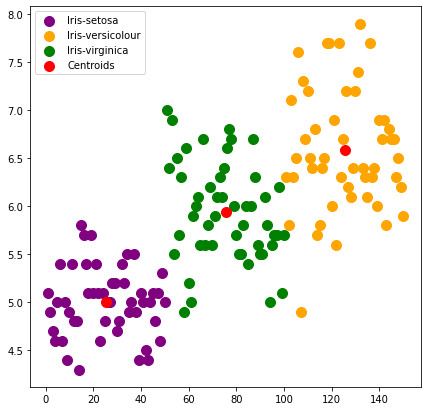

In [10]:
#Visualising the clusters
plt.figure(figsize = (7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

# Decision Tree dengan Gini Index 



In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [53]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [54]:
# Load dataset iris
iris = datasets.load_iris()

data=pd.DataFrame(iris['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
data

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Preparing data for Model Building

In [56]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [57]:
train_X=train[['Sepal Length',"Sepal Width","Petal Length","Petal Width"]]
train_y=train.Species

In [58]:
test_X=test[['Sepal Length',"Sepal Width","Petal Length","Petal Width"]]
test_y=test.Species

Import Decision Tree to build Classification Model

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
DT = DecisionTreeClassifier(criterion='gini')
model = DT.fit(train_X, train_y)

In [61]:
DT.predict(test_X)

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

Cek Akurasi Model

In [62]:
DT.score(test_X, test_y)

1.0

In [63]:
#prediction
y_pred = DT.predict(test_X)

In [64]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 1.0


Visualisasi Decision tree

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

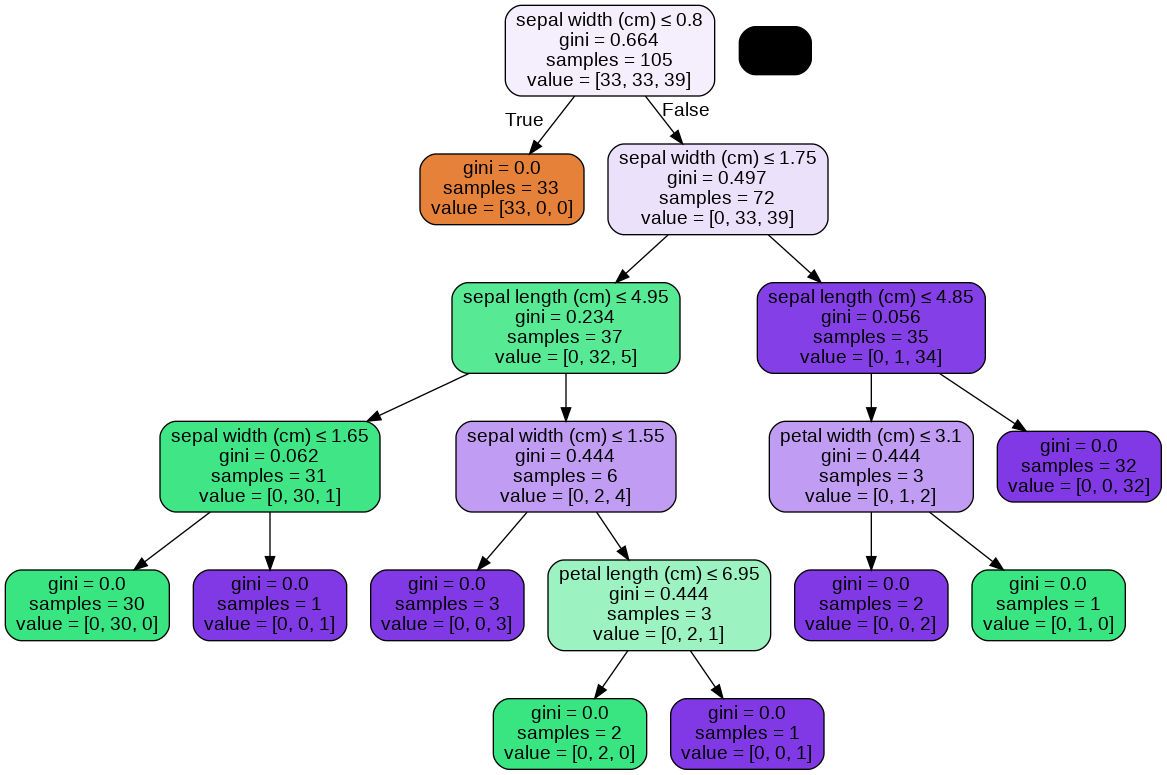

In [66]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# UTS

Analisa Terhadap Dataset Breast Cancer Coimbra dengan menggunakan klasifikasi Naive Bayes dan Decision Tree

## Naive Bayes

P(C|X) = P(X|C) * P(C)

P(X|C) = $$ \frac{1}{\sqrt{2\Pi \sigma^{2}j }} e^{-\frac{(X_i-\mu)^{2}}{2\sigma^{2}j}} $$

In [26]:

# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [27]:
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/dataR2.csv"
dataset = pd.read_csv(dataset_url)

In [28]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [29]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:10].values
y = dataset['Classification'].values

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [31]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [33]:
GaussianNB(priors=None)

GaussianNB()

In [34]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[2 1 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 2 2 1 1 1 2 1]


In [35]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:10,:]

array([[2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2]])

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0 13]]


In [37]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))     

Correct predictions:  24
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


## Decision Tree With Gini Index

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [12]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load dataset iris
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/dataR2.csv"
data = pd.read_csv(dataset_url)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [15]:
Data1 = data[data.Classification == 1]
Data1.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [16]:
Data2 = data[data.Classification == 2]
Data2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2


In [17]:
x = data.drop(["Classification"], axis = 1)
y = data.Classification.values

In [18]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

Preparing data for Model Building

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Import Decision Tree to build Classification Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Cek Akurasi Model

In [22]:
# prediction
dt.score(x_test, y_test)

0.7714285714285715

In [23]:
y_pred = dt.predict(x_test)

In [24]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7714285714285715


Visualisasi Decision tree

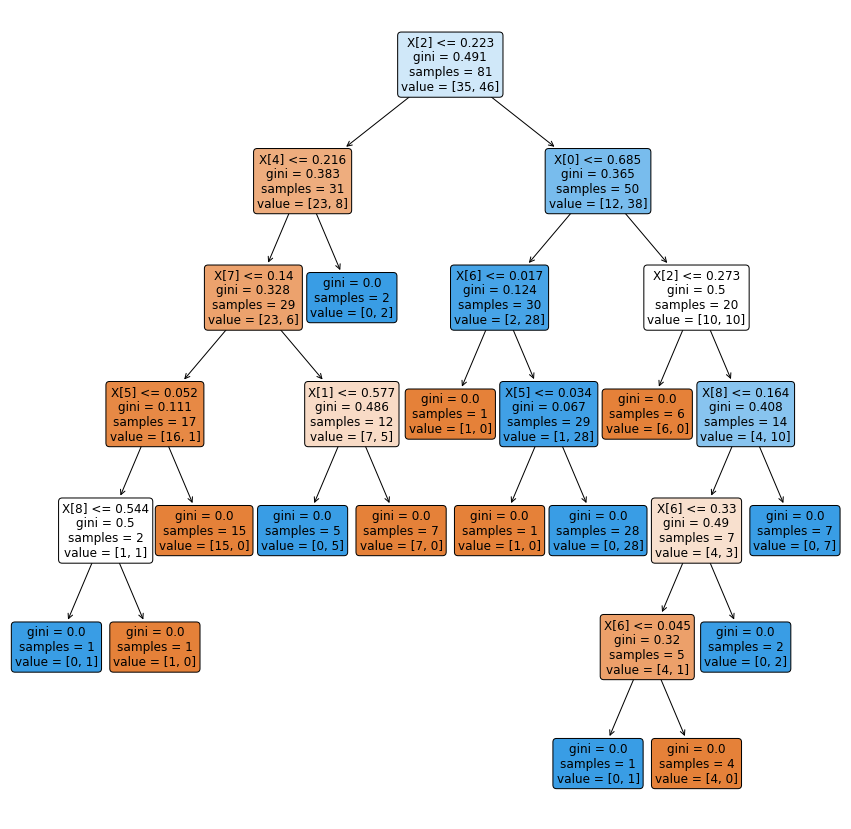

In [25]:
#plt the figure, setting a black background
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(dt,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()